# Import les bibliotheques

In [53]:
import pandas as pd
import numpy as np 
import nltk
import matplotlib.pyplot as plt
import seaborn
import re
from nltk import word_tokenize
from nltk.corpus import stopwords

# Import du dataset + Mettre en minuscule

In [51]:
df = pd.read_csv('data.csv')
df['Description'] = df['Description'].str.lower()
df['Title'] = df['Title'].str.lower()
df['Company'] = df['Company'].str.lower()
df['Title_clean'] = ''


# Traitement des donnees 

### Rechercher l'entreprise le plus populaire

In [47]:
most_vacancy= df.groupby('Company').count().sort_values('id', ascending=False)
most_vacancy_show = most_vacancy.head(20)

### Visualiser le graphique

Text(0, 0.5, 'Nombre de postes')

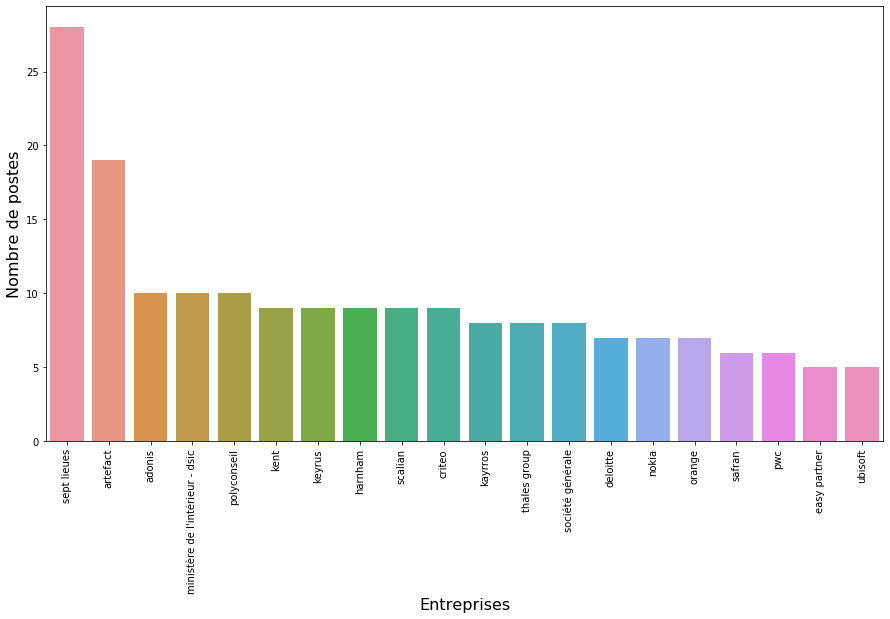

In [50]:
fig, ax = plt.subplots(figsize = (15,8))
ax = seaborn.barplot(x = most_vacancy_show.index, y = most_vacancy_show['id'])    
ax.set_xticklabels(most_vacancy_show.index,rotation=90)
ax.set_xlabel('Entreprises',fontsize=16, color='black')
ax.set_ylabel('Nombre de postes',fontsize=16) 

### Les postes

In [74]:
for i in range(len(df)):
    if re.findall('data scientist', df['Title'][i]) != []:
        df['Title_clean'][i] = 'Data Scientist'
    elif re.findall('data analyst', df['Title'][i]) != []:
        df['Title_clean'][i] = 'Data Analyst'
    elif re.findall('ingenieur data|data engineer', df['Title'][i]) != []:
        df['Title_clean'][i] = 'Ingenieur Data'
    elif re.findall('data architect|architecte', df['Title'][i]) != []:
        df['Title_clean'][i] = 'Data Architect'
    elif re.findall('business developer', df['Title'][i]) != []:
        df['Title_clean'][i] = 'Business Developer'
    elif re.findall('consultant data', df['Title'][i]) != []:
        df['Title_clean'][i] = 'Consultant Data'
    elif re.findall('developpeur|developper', df['Title'][i]) != []:
        df['Title_clean'][i] = 'Developpeur'
    else:
        df['Title_clean'][i] = df['Title'][i]

### Visualiser les donnees

In [75]:
most_popular= df.groupby('Title_clean').count().sort_values('id', ascending=False)
most_popular_show = most_popular.head(20)

Text(0, 0.5, 'Les postes')

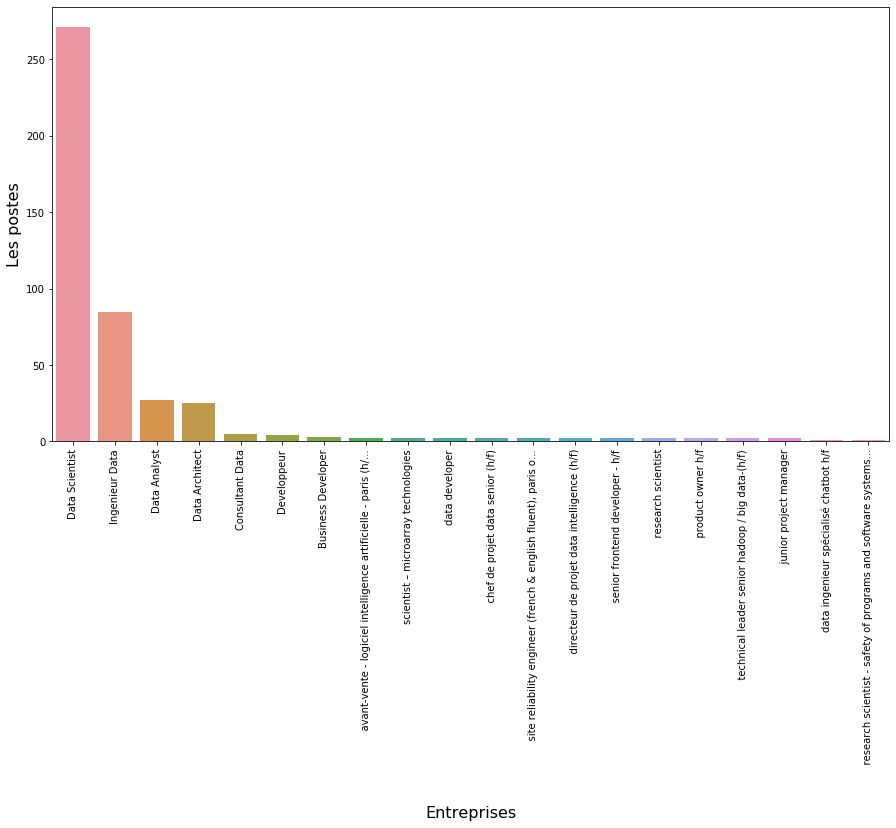

In [76]:
fig, ax = plt.subplots(figsize = (15,8))
ax = seaborn.barplot(x = most_popular_show.index, y = most_popular_show['id'])    
ax.set_xticklabels(most_popular_show.index,rotation=90)
ax.set_xlabel('Entreprises',fontsize=16, color='black')
ax.set_ylabel('Les postes',fontsize=16) 